In [36]:
import pandas as pd

In [37]:
df=pd.read_csv("SeoulBikeData.csv")

In [38]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

/tmp/ipykernel_532708/674057924.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('SeoulBikeData.csv', parse_dates=['Date'])


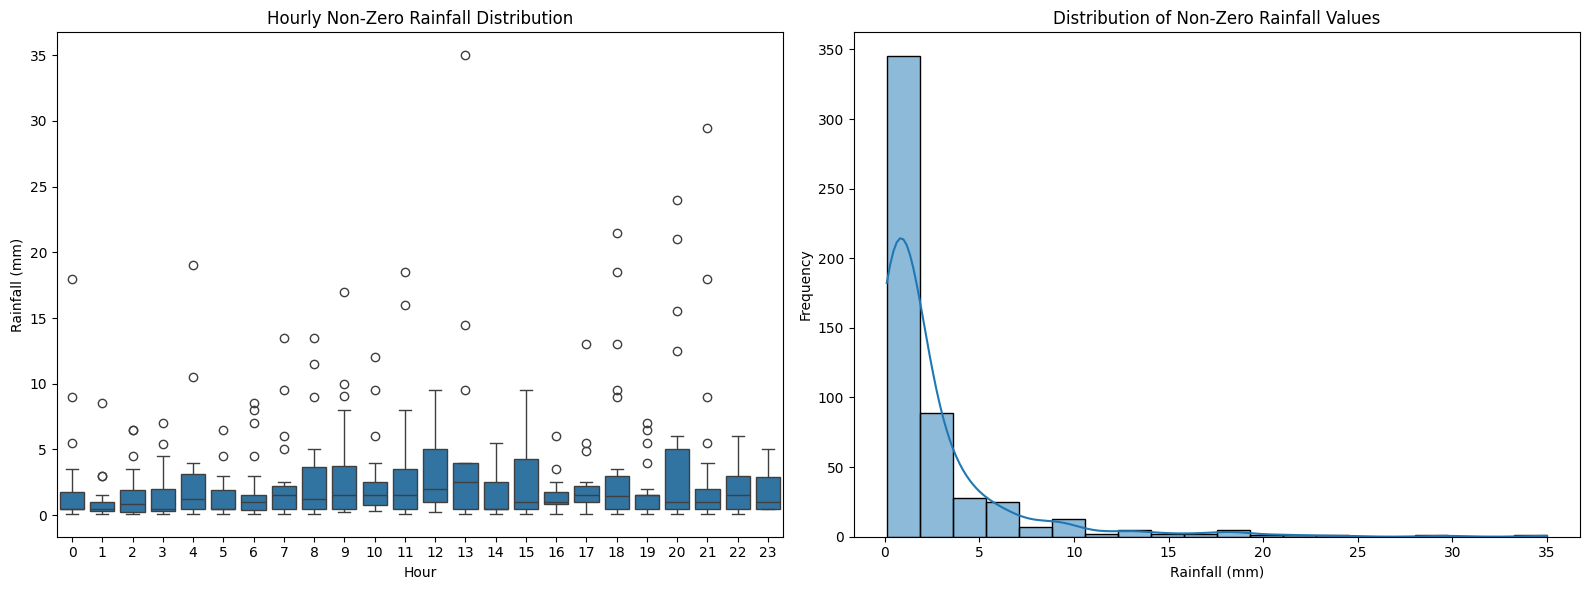

Quartiles for Non-Zero Rainfall (mm):
Q1 (25th percentile): 0.50 mm
Q2 (50th percentile - Median): 1.00 mm
Q3 (75th percentile): 2.50 mm


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('SeoulBikeData.csv', parse_dates=['Date'])

# Filter out rows where Rainfall is non-zero
rainfall_data = data[data['Rainfall(mm)'] > 0]

# Create a figure with two subplots: one for the boxplot and one for the histogram
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for hourly non-zero rainfall distribution
sns.boxplot(x='Hour', y='Rainfall(mm)', data=rainfall_data, ax=axs[0])
axs[0].set_title('Hourly Non-Zero Rainfall Distribution')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Rainfall (mm)')

# Histogram to visualize the distribution of rainfall values
sns.histplot(rainfall_data['Rainfall(mm)'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Non-Zero Rainfall Values')
axs[1].set_xlabel('Rainfall (mm)')
axs[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# Calculate and print the quartiles for the non-zero rainfall values
quartiles = rainfall_data['Rainfall(mm)'].quantile([0.25, 0.5, 0.75])
print("Quartiles for Non-Zero Rainfall (mm):")
print(f"Q1 (25th percentile): {quartiles[0.25]:.2f} mm")
print(f"Q2 (50th percentile - Median): {quartiles[0.5]:.2f} mm")
print(f"Q3 (75th percentile): {quartiles[0.75]:.2f} mm")


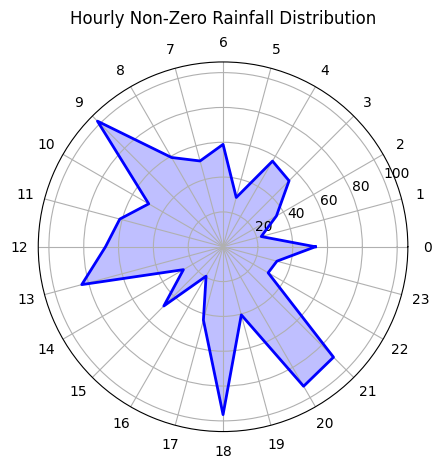

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('SeoulBikeData.csv')

# Filter for non-zero rainfall
df_non_zero_rainfall = df[df['Rainfall(mm)'] > 0]

# Aggregate data by hour
rainfall_by_hour = df_non_zero_rainfall.groupby('Hour')['Rainfall(mm)'].sum().reindex(range(24), fill_value=0)

# Prepare data for plotting
hours = np.arange(24)
rainfall = rainfall_by_hour.values

# Create the radial plot
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False).tolist()
theta += theta[:1]  # Complete the loop
rainfall = np.concatenate((rainfall, [rainfall[0]]))  # Complete the loop

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, rainfall, color='blue', linewidth=2, linestyle='solid')
ax.fill(theta, rainfall, color='blue', alpha=0.25)

# Labels
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))

# Title
plt.title('Hourly Non-Zero Rainfall Distribution', va='bottom')

plt.show()


In [86]:
df_non_zero_rainfall['Rainfall(mm)'].describe()

count    528.000000
mean       2.466856
std        3.927524
min        0.100000
25%        0.500000
50%        1.000000
75%        2.500000
max       35.000000
Name: Rainfall(mm), dtype: float64

Max value for plotting: 102.0


/tmp/ipykernel_532708/2851579012.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of labels (5).

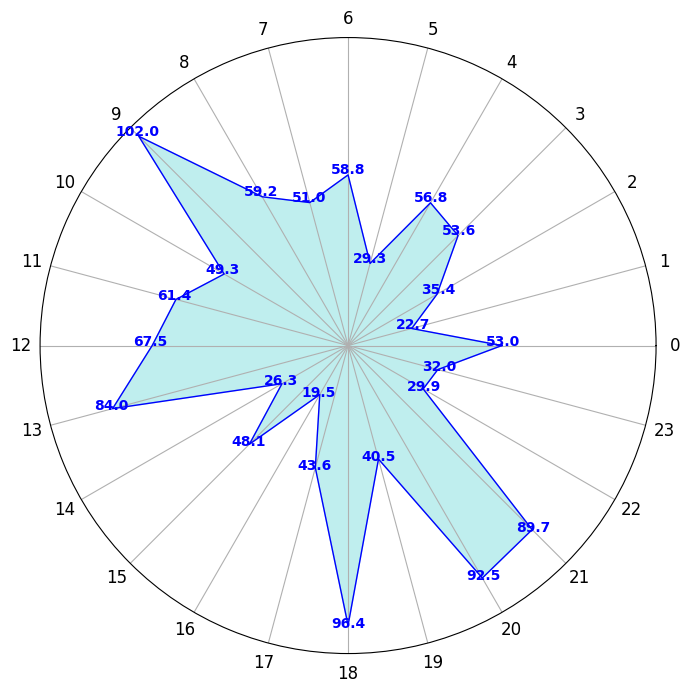

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('SeoulBikeData.csv', parse_dates=['Date'])

# Filter out rows where Rainfall is non-zero
rainfall_data = data[data['Rainfall(mm)'] > 0]

# Aggregate rainfall by hour
hourly_rainfall = rainfall_data.groupby('Hour')['Rainfall(mm)'].sum().reset_index()

# Prepare data for radial plot
angles = np.linspace(0, 2 * np.pi, len(hourly_rainfall), endpoint=False).tolist()
values = hourly_rainfall['Rainfall(mm)'].tolist()

# Ensure the plot values are correct
print(f"Max value for plotting: {max(values)}")

# Complete the loop
values += values[:1]
angles += angles[:1]

# Create the radial plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='c', alpha=0.25, label='Total Rainfall (mm)')
ax.plot(angles, values, color='blue', linewidth=1)

# Add labels for each hour with rainfall values
for i, (angle, value) in enumerate(zip(angles[:-1], values[:-1])):
    ax.text(angle, value + 0.5, f'{value:.1f}', horizontalalignment='center', size=10, color='blue', weight='semibold')

# Add labels for each hour
ax.set_xticks(angles[:-1])
ax.set_xticklabels(hourly_rainfall['Hour'], fontsize=12)

# Add labels and title
# Adjust y-ticks to match actual data range
max_value = np.max(values)
yticks = []  # Create 5 ticks from 0 to max value
#yticklabels = [f'{int(tick)}' for tick in yticks]  # Format labels as integers

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=10)

ax.set_title('Hourly Non-Zero Rainfall Distribution', fontsize=16, pad=20)

plt.legend(loc='upper right')
plt.show()


/tmp/ipykernel_539224/3608627931.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['LogRainfall'] = np.log1p(df_non_zero_rainfall['Rainfall(mm)'])


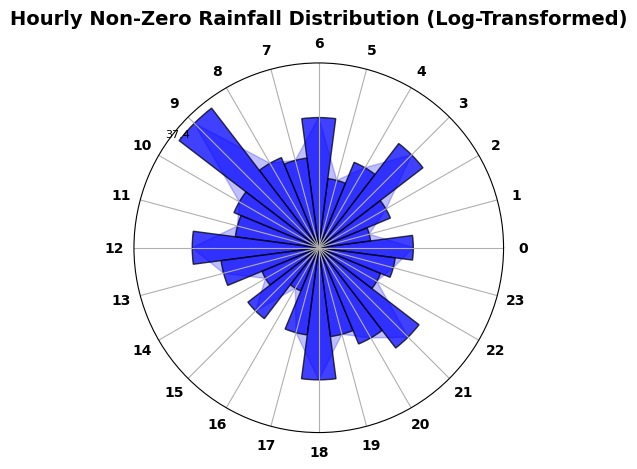

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('SeoulBikeData.csv')

# Filter for non-zero rainfall
df_non_zero_rainfall = df[df['Rainfall(mm)'] > 0]

# Apply log transformation
df_non_zero_rainfall['LogRainfall'] = np.log1p(df_non_zero_rainfall['Rainfall(mm)'])

# Aggregate data by hour with transformed rainfall
rainfall_by_hour = df_non_zero_rainfall.groupby('Hour')['LogRainfall'].sum().reindex(range(24), fill_value=0)

# Prepare data for plotting
hours = np.arange(24)
rainfall = rainfall_by_hour.values

# Create the radial plot
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False).tolist()
theta += theta[:1]  # Complete the loop
rainfall = np.concatenate((rainfall, [rainfall[0]]))  # Complete the loop

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.fill(theta, rainfall, color='blue', alpha=0.25)  # Single color for the shaded region

# Define bar width
width = 2 * np.pi / 24

# Plot bars with the same color and edge color
bars = ax.bar(theta[:-1], rainfall[:-1], width=width, color='blue', edgecolor='black', alpha=0.75)

# Find peak values
peak_indices = np.where(rainfall == rainfall.max())[0]

# Label only the peaks
for i in peak_indices:
    angle = theta[i] + width / 2
    height = rainfall[i]
    ax.text(angle, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=8, color='black')

# Customize the ticks
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24), fontsize=10, color='black', fontweight='bold')

# Remove unwanted ticks
ax.set_yticks([])  # Remove radial ticks

# Title and labels
ax.set_title('Hourly Non-Zero Rainfall Distribution (Log-Transformed)', va='bottom', fontsize=14, fontweight='bold')

plt.show()


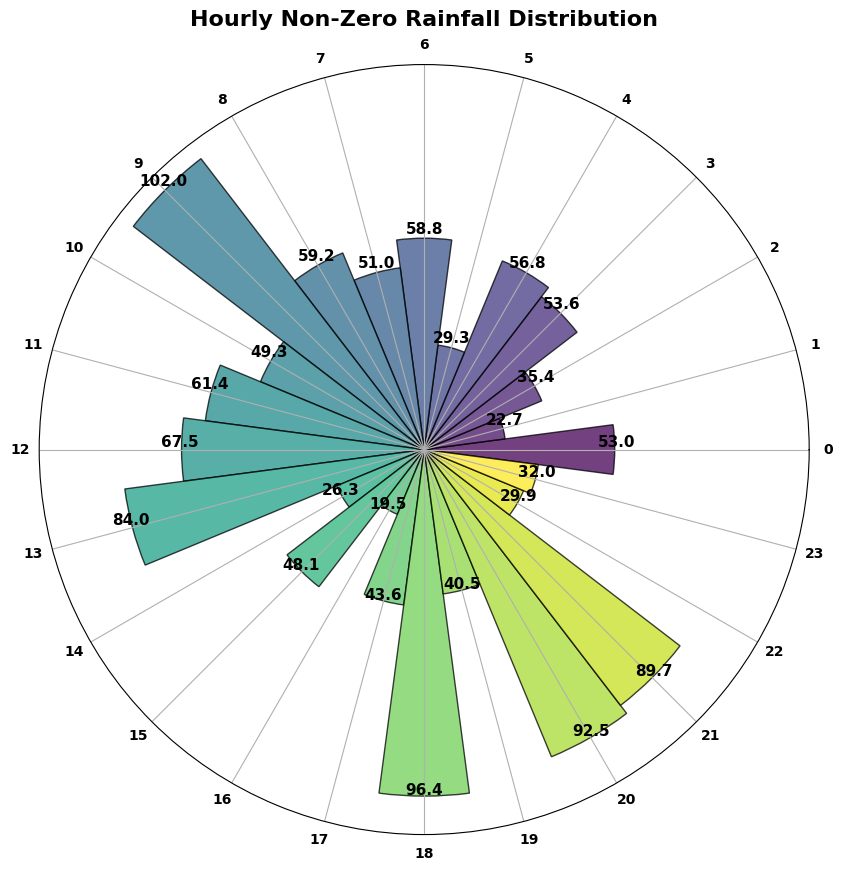

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('SeoulBikeData.csv')

# Filter for non-zero rainfall
df_non_zero_rainfall = df[df['Rainfall(mm)'] > 0]

# Aggregate data by hour
rainfall_by_hour = df_non_zero_rainfall.groupby('Hour')['Rainfall(mm)'].sum().reindex(range(24), fill_value=0)

# Prepare data for plotting
hours = np.arange(24)
rainfall = rainfall_by_hour.values

# Create the radial plot
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False).tolist()
theta += theta[:1]  # Complete the loop
rainfall = np.concatenate((rainfall, [rainfall[0]]))  # Complete the loop

# Define colors
colors = plt.cm.viridis(np.linspace(0, 1, len(hours)))

# Increase the size of the plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))
bars = ax.bar(theta[:-1], rainfall[:-1], width=2 * np.pi / 24, color=colors, edgecolor='black', alpha=0.75)

# Add labels
for bar, value in zip(bars, rainfall[:-1]):
    angle = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    ax.text(angle, height + 0.5, f'{value:.1f}', ha='center', va='bottom', fontsize=11, color='black', weight="semibold")

# Customize the ticks
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24), fontsize=10, color='black', fontweight='bold')

# Remove unwanted ticks
ax.set_yticks([])  # Remove radial ticks

# Title and labels
ax.set_title('Hourly Non-Zero Rainfall Distribution', va='bottom', fontsize=16, fontweight='bold')

plt.show()


/tmp/ipykernel_539224/664099288.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['LogRainfall'] = np.log1p(df_non_zero_rainfall['Rainfall(mm)'])


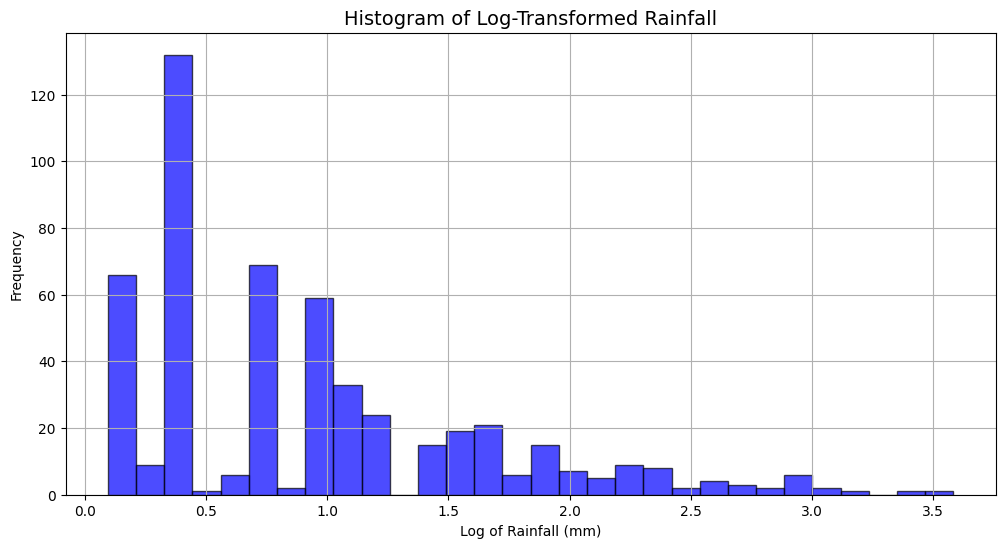

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('SeoulBikeData.csv')

# Filter for non-zero rainfall
df_non_zero_rainfall = df[df['Rainfall(mm)'] > 0]

# Apply log transformation
df_non_zero_rainfall['LogRainfall'] = np.log1p(df_non_zero_rainfall['Rainfall(mm)'])

# Plot histogram for log-transformed data
plt.figure(figsize=(12, 6))
plt.hist(df_non_zero_rainfall['LogRainfall'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Log-Transformed Rainfall', fontsize=14)
plt.xlabel('Log of Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipykernel_539224/2281289578.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['SqrtRainfall'] = np.sqrt(df_non_zero_rainfall['Rainfall(mm)'])


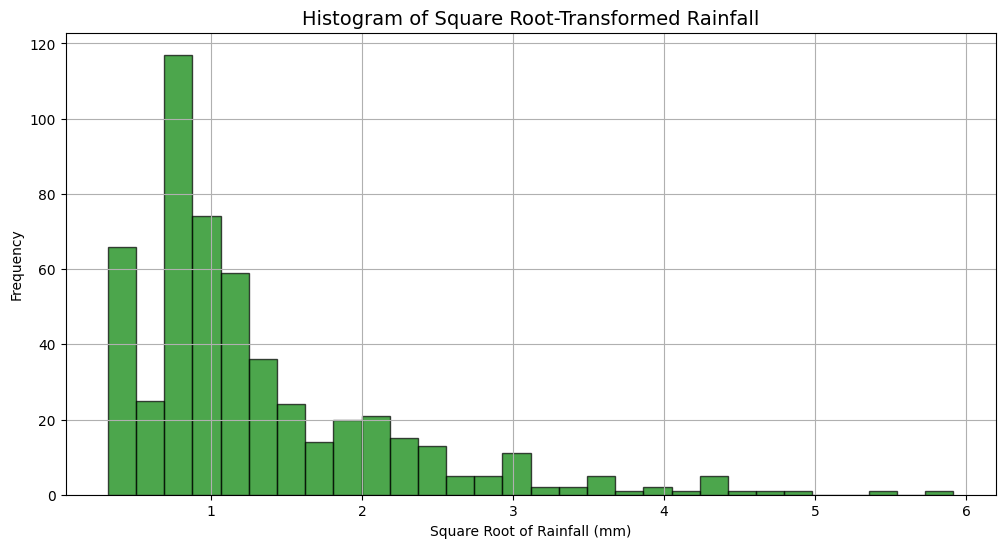

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('SeoulBikeData.csv')

# Filter for non-zero rainfall
df_non_zero_rainfall = df[df['Rainfall(mm)'] > 0]

# Apply square root transformation
df_non_zero_rainfall['SqrtRainfall'] = np.sqrt(df_non_zero_rainfall['Rainfall(mm)'])

# Plot histogram for square root-transformed data
plt.figure(figsize=(12, 6))
plt.hist(df_non_zero_rainfall['SqrtRainfall'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Square Root-Transformed Rainfall', fontsize=14)
plt.xlabel('Square Root of Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipykernel_539224/398313256.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['LogRainfall'] = np.log1p(df_non_zero_rainfall['Rainfall(mm)'])
/tmp/ipykernel_539224/398313256.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['Quartile'] = pd.cut(df_non_zero_rainfall['LogRainfall'], bins=[-np.inf] + list(quartiles) + [np.inf], labels=labels)


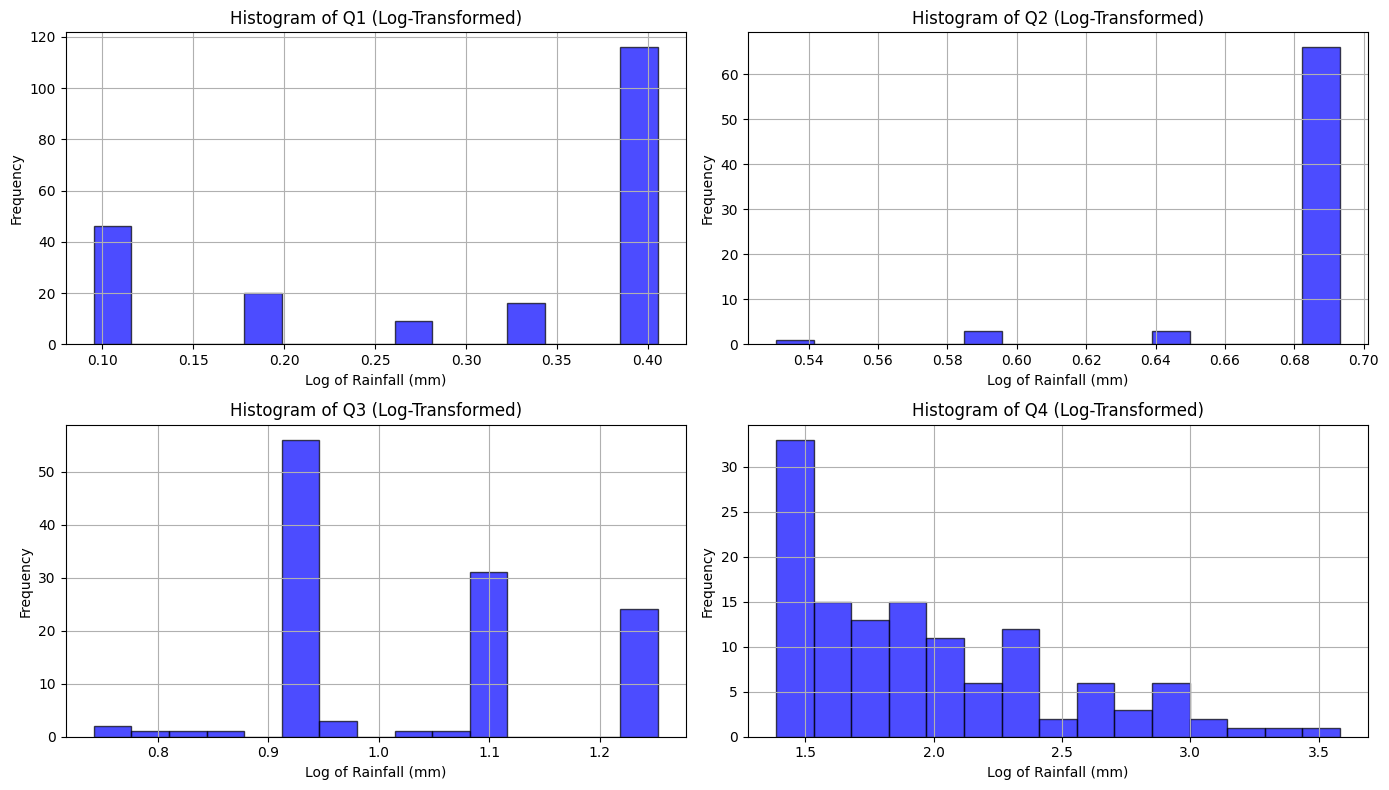

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('SeoulBikeData.csv')

# Filter for non-zero rainfall
df_non_zero_rainfall = df[df['Rainfall(mm)'] > 0]

# Apply log transformation
df_non_zero_rainfall['LogRainfall'] = np.log1p(df_non_zero_rainfall['Rainfall(mm)'])

# Compute quartiles
quartiles = np.percentile(df_non_zero_rainfall['LogRainfall'], [25, 50, 75])
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Divide data into quartiles
df_non_zero_rainfall['Quartile'] = pd.cut(df_non_zero_rainfall['LogRainfall'], bins=[-np.inf] + list(quartiles) + [np.inf], labels=labels)

# Plot histograms for each quartile
plt.figure(figsize=(14, 8))
for i, label in enumerate(labels):
    plt.subplot(2, 2, i+1)
    data = df_non_zero_rainfall[df_non_zero_rainfall['Quartile'] == label]['LogRainfall']
    plt.hist(data, bins=15, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {label} (Log-Transformed)', fontsize=12)
    plt.xlabel('Log of Rainfall (mm)')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_539224/1837296358.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['SqrtRainfall'] = np.sqrt(df_non_zero_rainfall['Rainfall(mm)'])
/tmp/ipykernel_539224/1837296358.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['Quartile'] = pd.cut(df_non_zero_rainfall['SqrtRainfall'], bins=[-np.inf] + list(quartiles) + [np.inf], labels=labels)


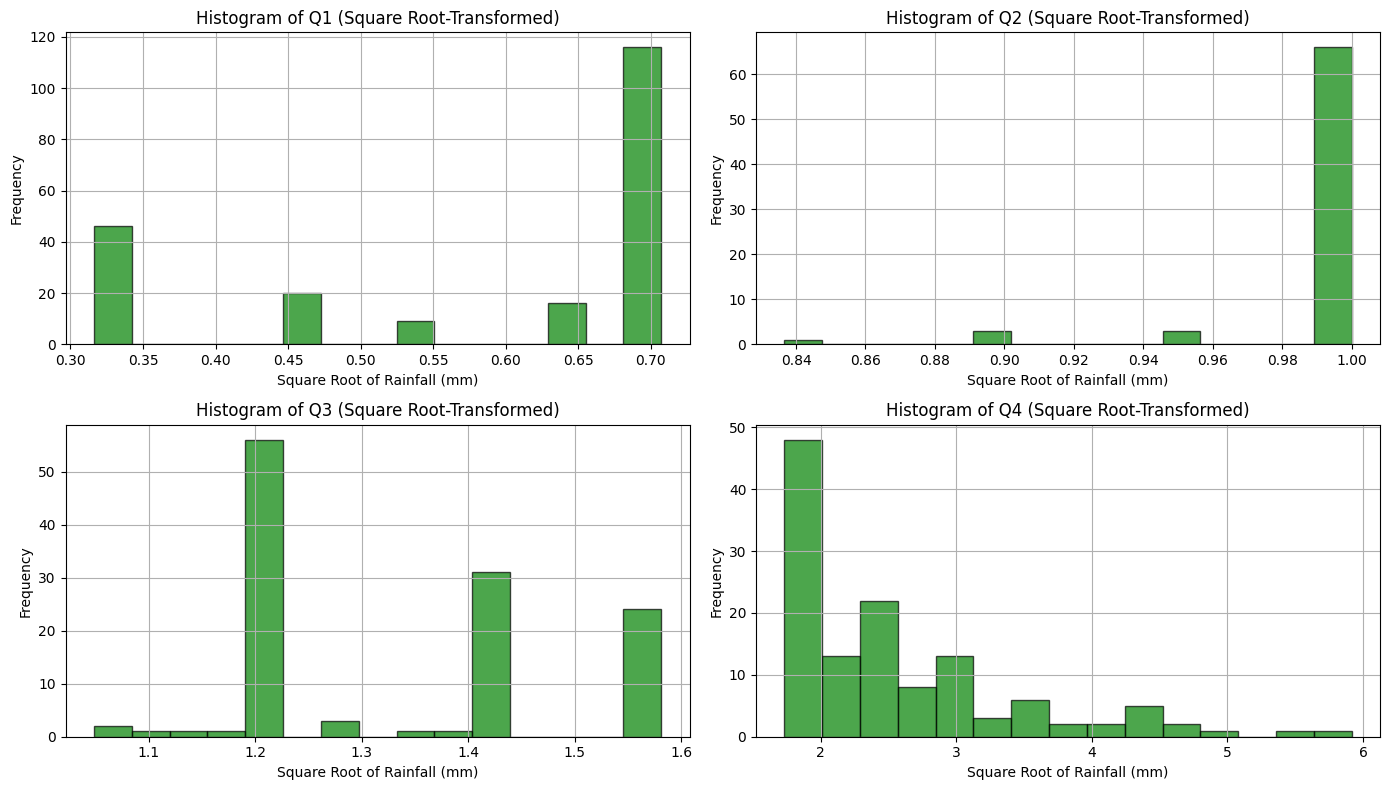

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('SeoulBikeData.csv')

# Filter for non-zero rainfall
df_non_zero_rainfall = df[df['Rainfall(mm)'] > 0]

# Apply square root transformation
df_non_zero_rainfall['SqrtRainfall'] = np.sqrt(df_non_zero_rainfall['Rainfall(mm)'])

# Compute quartiles
quartiles = np.percentile(df_non_zero_rainfall['SqrtRainfall'], [25, 50, 75])
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Divide data into quartiles
df_non_zero_rainfall['Quartile'] = pd.cut(df_non_zero_rainfall['SqrtRainfall'], bins=[-np.inf] + list(quartiles) + [np.inf], labels=labels)

# Plot histograms for each quartile
plt.figure(figsize=(14, 8))
for i, label in enumerate(labels):
    plt.subplot(2, 2, i+1)
    data = df_non_zero_rainfall[df_non_zero_rainfall['Quartile'] == label]['SqrtRainfall']
    plt.hist(data, bins=15, color='green', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {label} (Square Root-Transformed)', fontsize=12)
    plt.xlabel('Square Root of Rainfall (mm)')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


/tmp/ipykernel_539224/711040326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['BoxCoxRainfall'], lambda_ = stats.boxcox(df_non_zero_rainfall['Rainfall(mm)'])


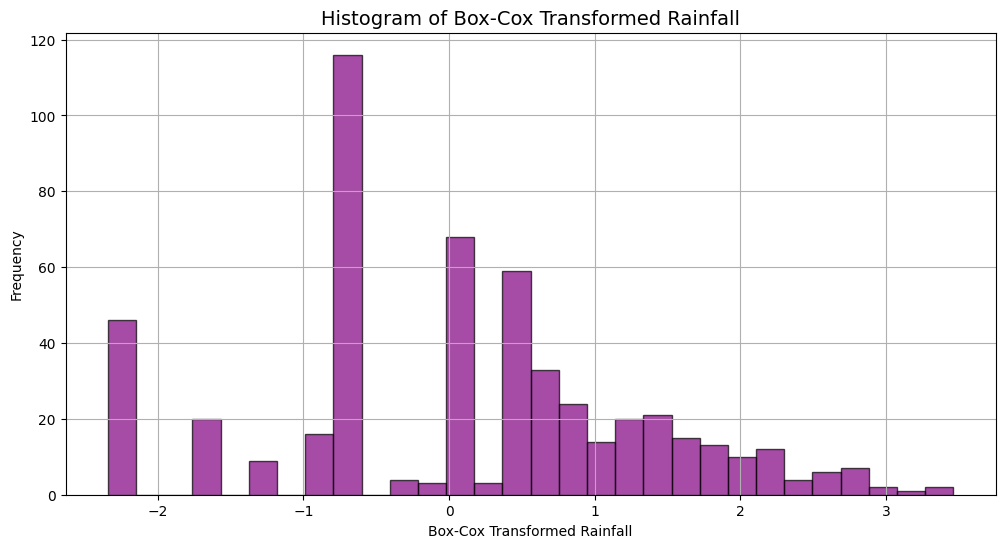

In [6]:
from scipy import stats

# Apply Box-Cox transformation
df_non_zero_rainfall['BoxCoxRainfall'], lambda_ = stats.boxcox(df_non_zero_rainfall['Rainfall(mm)'])

# Plot histogram for Box-Cox transformed data
plt.figure(figsize=(12, 6))
plt.hist(df_non_zero_rainfall['BoxCoxRainfall'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Box-Cox Transformed Rainfall', fontsize=14)
plt.xlabel('Box-Cox Transformed Rainfall')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipykernel_539224/89365025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['YeoJohnsonRainfall'] = pt.fit_transform(df_non_zero_rainfall[['Rainfall(mm)']])


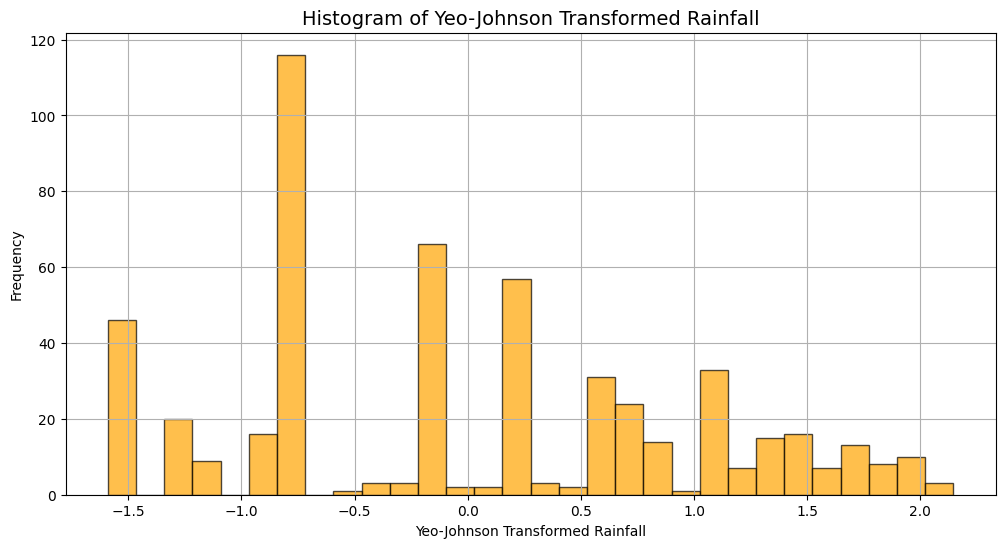

In [7]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_non_zero_rainfall['YeoJohnsonRainfall'] = pt.fit_transform(df_non_zero_rainfall[['Rainfall(mm)']])

# Plot histogram for Yeo-Johnson transformed data
plt.figure(figsize=(12, 6))
plt.hist(df_non_zero_rainfall['YeoJohnsonRainfall'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of Yeo-Johnson Transformed Rainfall', fontsize=14)
plt.xlabel('Yeo-Johnson Transformed Rainfall')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipykernel_539224/2505258635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['PowerTransformedRainfall'] = pt.fit_transform(df_non_zero_rainfall[['Rainfall(mm)']])


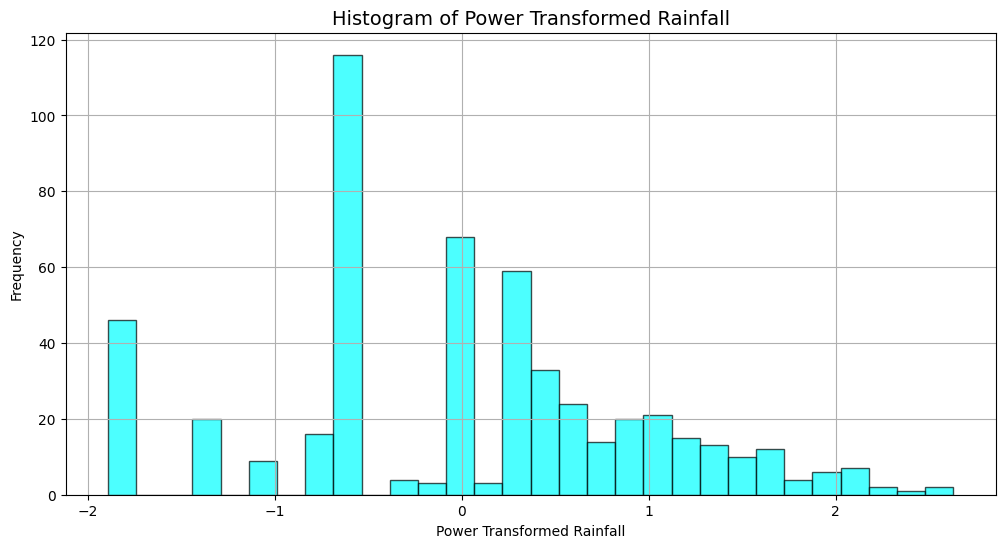

In [8]:
from sklearn.preprocessing import PowerTransformer

# Apply power transformation
pt = PowerTransformer(method='box-cox')  # or method='yeo-johnson'
df_non_zero_rainfall['PowerTransformedRainfall'] = pt.fit_transform(df_non_zero_rainfall[['Rainfall(mm)']])

# Plot histogram for power-transformed data
plt.figure(figsize=(12, 6))
plt.hist(df_non_zero_rainfall['PowerTransformedRainfall'], bins=30, color='cyan', edgecolor='black', alpha=0.7)
plt.title('Histogram of Power Transformed Rainfall', fontsize=14)
plt.xlabel('Power Transformed Rainfall')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipykernel_539224/195105863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero_rainfall['InverseRainfall'] = 1 / (df_non_zero_rainfall['Rainfall(mm)'] + 1)  # Added 1 to avoid division by zero


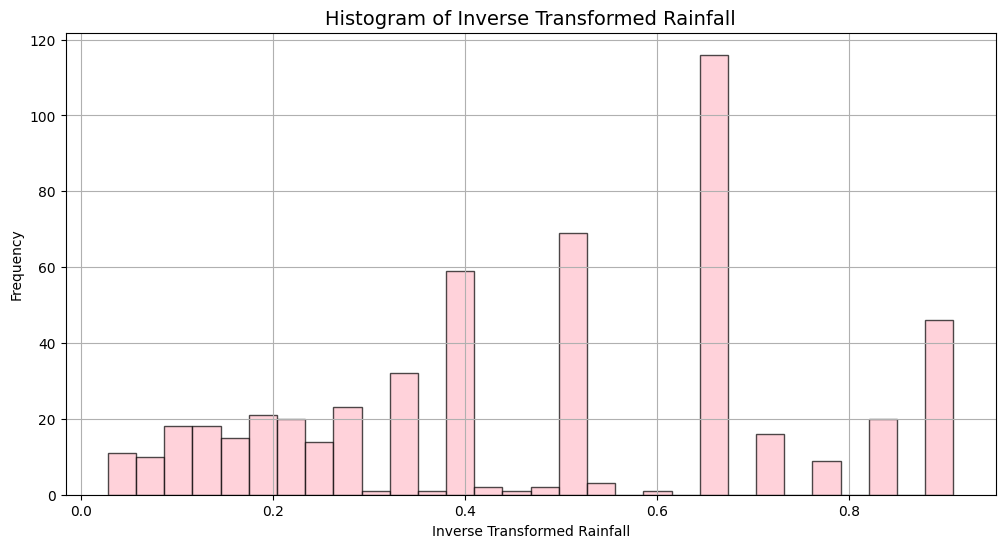

In [9]:
# Apply inverse transformation
df_non_zero_rainfall['InverseRainfall'] = 1 / (df_non_zero_rainfall['Rainfall(mm)'] + 1)  # Added 1 to avoid division by zero

# Plot histogram for inverse-transformed data
plt.figure(figsize=(12, 6))
plt.hist(df_non_zero_rainfall['InverseRainfall'], bins=30, color='pink', edgecolor='black', alpha=0.7)
plt.title('Histogram of Inverse Transformed Rainfall', fontsize=14)
plt.xlabel('Inverse Transformed Rainfall')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
